In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit
import sensormotion as sm

In [624]:
def read_data(name):
        total_accel = ''
        device_user_accel = ''
        
        print('--------- Data Loading: ---------')
        
        with open(f'data_files/{name}_ACC.txt', 'r') as reader:
            total_accel_data = reader.readlines()[0][:-1]
            total_accel = np.array([[float(i) for i in xyz.split(',')] for xyz in total_accel_data.split(';')])
        
        print(f'- data_files/{name}_ACC.txt loaded')
        
        with open(f'data_files/{name}_USER_ACC.txt', 'r') as reader:
            device_user_accel_data = reader.readlines()[0][:-1]
            device_user_accel = np.array([[float(i) for i in xyz.split(',')] for xyz in device_user_accel_data.split(';')])
            
        print(f'- data_files/{name}_USER_ACC.txt loaded')
        
        print('- total accel shape:', total_accel.shape)
        print('- device user accel shape:', device_user_accel.shape)
        
        return total_accel, device_user_accel
    
data, usr_data = read_data("60_60")

--------- Data Loading: ---------
- data_files/60_60_ACC.txt loaded
- data_files/60_60_USER_ACC.txt loaded
- total accel shape: (235, 3)
- device user accel shape: (235, 3)


In [1]:
from platform import python_version

print(python_version())

# total_acceleration = "-0.050057195127010345,0.8627079129219055,12.4992036819458;1.2401725053787231,0.9309676289558411,10.206392288208008;1.4638729095458984,1.3678301572799683,9.246206283569336;2.037254810333252,2.6159064769744873,8.011063575744629;0.7606773972511292,3.396223545074463,7.730120658874512;-0.37219542264938354,4.32910680770874,8.085309982299805;-0.09484516829252243,4.478799343109131,8.340387344360352;-0.11041317880153656,4.849078178405762,8.632108688354492;0.40021786093711853,5.200197219848633,8.378229141235352;0.2550760507583618,5.285223007202148,8.094172477722168;0.26297977566719055,5.347495079040527,7.838138580322266;-0.014849488623440266,5.517306804656982,8.126267433166504;0.3312395215034485,5.228938579559326,8.10902214050293;-0.44404783844947815,5.5467658042907715,8.089384078979492;-0.37219542264938354,5.471320629119873,8.070462226867676;-0.32165926694869995,5.430604457855225,8.198358535766602;-0.06299059838056564,5.346776485443115,8.301587104797363;0.12167006731033325,5.406174659729004,8.022799491882324;0.36692625284194946,5.4102463722229,7.961485385894775;0.5159002542495728,5.26630163192749,8.15404987335205;0.8155247569084167,4.3568902015686035,7.029080390930176;0.7714551687240601,1.9321110248565674,8.718809127807617;-0.5604487061500549,2.999358654022217,10.015745162963867;-4.783932685852051,3.965533494949341,11.101675033569336;-6.2863664627075195,-0.590387225151062,3.571303606033325;-6.871006011962891,-4.808841705322266,2.0688698291778564;-9.404520988464355,-7.571086883544922,5.524970054626465;-11.550511360168457,-4.498199462890625,5.37264347076416;-11.737567901611328,-2.254249334335327,3.1569550037384033;-10.313692092895508,-5.7199296951293945,4.777705192565918;-6.142661094665527,-5.072299957275391,2.6827292442321777;-5.234926223754883,-6.108652114868164,-0.21244363486766815;-11.567278861999512,-9.035200119018555,0.946535587310791;-8.598337173461914,-5.3949174880981445,1.9754621982574463;-11.300466537475586,-6.605629920959473,0.8207939863204956;-9.85791015625,-10.032510757446289,2.1871871948242188;-4.270188331604004,-7.242482662200928,1.0423387289047241;-5.08188009262085,-7.874544620513916,0.3123184144496918;-9.764501571655273,-8.005314826965332,-0.13628003001213074;-10.211183547973633,-5.500300884246826,0.40979814529418945;-12.157426834106445,-8.507084846496582,1.1642483472824097;-7.195777893066406,-9.682111740112305,1.4092650413513184;-4.212466716766357,-6.2142744064331055,0.27782925963401794;-5.939558982849121,-9.483318328857422,1.4073489904403687;-9.250996589660645,-8.365774154663086,0.950846791267395;-10.917253494262695,-6.291156768798828,2.6080026626586914;-12.868764877319336,-10.546016693115234,0.41171425580978394;-5.887346267700195,-9.598523139953613,0.35710638761520386;-3.011094331741333,-5.8540544509887695,0.23112520575523376;-9.855993270874023,-11.434110641479492,1.4360899925231934;-7.233860015869141,-6.802027225494385,0.8924068212509155;-10.137655258178711,-6.138829231262207,2.2499382495880127;-12.255145072937012,-8.85508918762207,-0.12214907258749008;-5.679213047027588,-8.239554405212402,0.05412881448864937;-4.426347255706787,-6.316065788269043,-0.5190138220787048;-8.193568229675293,-9.591337203979492,1.4511789083480835;-7.681979179382324,-6.722989082336426,0.8938438296318054;-11.903307914733887,-6.178587913513184,0.325491338968277;-10.847078323364258,-9.72905445098877,0.10993416607379913;-5.0893049240112305,-7.720540523529053,-0.055326350033283234;-4.633521556854248,-5.94913911819458,0.06442766636610031;-8.61582088470459,-9.403084754943848,3.389756679534912;-7.090394496917725,-6.400132656097412,1.6018295288085938;-11.441535949707031,-7.1873955726623535,1.9316318035125732;-10.239923477172852,-10.050952911376953,1.5108163356781006;-5.168581962585449,-8.50277328491211,1.433694839477539;-3.8069796562194824,-6.743587493896484,0.9108489155769348;-8.595222473144531,-9.834437370300293,5.157565116882324;-6.670298099517822,-5.843756198883057,3.260901689529419;-10.550087928771973,-6.986687660217285,2.2928099632263184;-9.377457618713379,-11.471475601196289,5.289054870605469;-3.569387912750244,-8.556662559509277,1.7630183696746826;-4.2414469718933105,-7.358164310455322,1.816667914390564;-8.7786865234375,-9.925210952758789,0.5427250266075134;-8.09393310546875,-6.7457427978515625,0.7992382049560547;-9.814319610595703,-6.7914886474609375,0.022034723311662674;-9.62510871887207,-10.577630996704102,1.8952268362045288;-5.412880897521973,-8.735334396362305,1.3663930892944336;-3.370595932006836,-7.306910514831543,1.1573026180267334;-8.966461181640625,-12.09132194519043,1.2720268964767456;-9.643549919128418,-6.780231475830078,-1.5941652059555054;-4.806446552276611,-7.799818515777588,2.3660993576049805;-7.683416843414307,-12.395975112915039,0.28884658217430115;1.0133583545684814,-8.780363082885742,1.449981451034546;-4.2766547203063965,-6.433663845062256,2.171618938446045;-5.090263843536377,-10.021014213562012,1.6229063272476196;-5.067030906677246,-9.366917610168457,0.5496708154678345;-5.165228843688965,-6.805380344390869,1.053835153579712;-7.788081169128418,-7.427622318267822,1.230352520942688;-10.090471267700195,-11.831216812133789,1.9153457880020142;-3.963857650756836,-7.4841461181640625,0.39303261041641235;-3.3195807933807373,-7.325112819671631,0.5743401646614075;-10.638465881347656,-12.910917282104492,2.397475004196167;-7.979687690734863,-6.084700584411621,1.9474395513534546;-9.434219360351562,-8.51426887512207,0.7719342708587646;-8.636897087097168,-11.647035598754883,-0.18130755424499512;-5.199957847595215,-9.084539413452148,1.244483470916748;-3.7348875999450684,-7.002734184265137,0.3377062678337097;-9.163576126098633,-12.148564338684082,2.4104084968566895;-7.033152103424072,-6.675328254699707,0.7398402094841003;-10.1196928024292,-6.275588512420654,1.3630399703979492;-11.670984268188477,-10.873662948608398,-0.5420066118240356;-5.297438144683838,-8.776291847229004,-0.04838060587644577;-3.4544239044189453,-6.79220724105835,1.009047269821167;-8.436190605163574,-11.82762336730957,3.1049816608428955;-8.915445327758789,-7.652759552001953,0.7110992670059204;-9.475175857543945,-7.515281677246094,2.1428780555725098;-8.174647331237793,-9.213394165039062,-0.25771060585975647;-8.670907974243164,-7.380918025970459,2.982593059539795;-9.484517097473145,-2.487051248550415,1.9009748697280884;-1.7915197610855103,-0.2054978609085083,8.475469589233398;0.5010507702827454,0.8864191174507141,8.876885414123535;-1.8169076442718506,2.8178117275238037,8.572710037231445;-1.171194076538086,4.357368469238281,7.9966936111450195;0.2299276888370514,4.716391086578369,8.665159225463867;1.229873538017273,4.830397605895996,7.9416069984436035;0.8744436502456665,5.360428333282471,8.211292266845703;1.0296448469161987,5.6349053382873535,7.707127571105957;0.8313323259353638,5.709870338439941,8.02208137512207;0.8054654002189636,5.709870338439941,7.850832939147949;0.41961798071861267,5.920158863067627,7.753352165222168;-0.0850253477692604,6.048774719238281,7.606773376464844;-0.03784225508570671,5.837768077850342,7.804368495941162;0.21938931941986084,5.600655555725098,8.050342559814453;0.2830984890460968,5.471799373626709,7.9892683029174805;-0.0414348766207695,5.455513000488281,8.10830307006836;0.28381699323654175,5.432760238647461,7.877896785736084;-0.018921129405498505,5.523533344268799,8.234524726867676;0.006466719321906567,5.452160835266113,8.014177322387695;-0.3393828272819519,5.5860443115234375,8.354517936706543;-1.046170949935913,4.656514644622803,8.55714225769043;-0.5135051608085632,5.149182319641113,8.419424057006836;0.6835557818412781,4.629929542541504,8.509478569030762;0.7745688557624817,4.688847541809082,7.617791175842285;0.4021339416503906,2.6824893951416016,9.506551742553711;-0.7094227075576782,1.3975292444229126,9.643549919128418;-3.5825603008270264,-0.4830876290798187,9.66534423828125;-3.3389809131622314,-0.8727672696113586,8.708032608032227;-1.2246044874191284,-0.11783792823553085,9.906769752502441;-0.3805782198905945,-0.10969465970993042,9.865095138549805;0.1563987284898758,0.38225477933883667,9.598283767700195;0.1434652954339981,0.6696643233299255,9.71707820892334;0.13532201945781708,0.6557729244232178,9.727617263793945;0.13148990273475647,0.6564913988113403,9.722827911376953;0.12669973075389862,0.6572098731994629,9.712767601013184;0.131729394197464,0.6540963053703308,9.725461959838867;0.13125036656856537,0.6550543904304504,9.723306655883789;0.12837627530097961,0.6564913988113403,9.726179122924805;0.12957383692264557,0.6560124158859253,9.702947616577148;0.12933431565761566,0.6564913988113403,9.675165176391602;0.13101087510585785,0.6615210771560669,9.66295051574707;0.130052849650383,0.653617262840271,9.663429260253906;0.13340595364570618,0.6550543308258057,9.660794258117676;0.13460350036621094,0.6555333733558655,9.659116744995117;0.13148990273475647,0.6555333733558655,9.66797924041748;0.13220840692520142,0.6562519073486328,9.684267044067383;0.13053186237812042,0.6550543904304504,9.698158264160156;0.1338849812746048,0.65840744972229,9.703666687011719;0.1341244876384735,0.6564913988113403,9.706061363220215;0.1341244876384735,0.6538568139076233,9.705102920532227;0.13268743455410004,0.6591260433197021,9.708696365356445;0.13316646218299866,0.6581679582595825,9.708696365356445;0.13292694091796875,0.6584075093269348,9.711331367492676;0.13532201945781708,0.6526592373847961,9.705583572387695;0.13148990273475647,0.6528987884521484,9.707019805908203;0.13268743455410004,0.6545753479003906,9.705582618713379;0.1319689005613327,0.6543358564376831,9.707259178161621;0.1278972625732422,0.6557729244232178,9.704625129699707;0.13268743455410004,0.6528987884521484,9.70821762084961;0.13484299182891846,0.6548148393630981,9.707019805908203;0.13220840692520142,0.6562519073486328,9.703906059265137;0.13053186237812042,0.653138279914856,9.709176063537598;0.13053186237812042,0.6564913988113403,9.705582618713379;0.1322084218263626,0.6562519073486328,9.7034273147583;0.13340595364570618,0.6557728052139282,9.697677612304688;0.1322084218263626,0.653377890586853,9.696721076965332;0.13220840692520142,0.6540963649749756,9.700551986694336;0.13436397910118103,0.6543358564376831,9.70462417602539;0.1355615258216858,0.655293881893158,9.703187942504883;0.1322084218263626,0.6514617204666138,9.69887638092041;0.1336454600095749,0.6548148989677429,9.699356079101562;0.13843563199043274,0.6545754075050354,9.702229499816895;0.1336454600095749,0.6524198055267334,9.703187942504883;0.13244791328907013,0.653617262840271,9.705343246459961;0.13675907254219055,0.6543358564376831,9.704145431518555;0.13316646218299866,0.6550543904304504,9.705583572387695;0.13484299182891846,0.6528987884521484,9.708456993103027;0.1358010470867157,0.6567308902740479,9.707979202270508;0.13604053854942322,0.6548148393630981,9.707498550415039;0.1319689005613327,0.6557729244232178,9.707738876342773;0.13651955127716064,0.6517012715339661,9.708456039428711;0.13053186237812042,0.653617262840271,9.70893669128418;0.1338849663734436,0.6526592969894409,9.707260131835938;0.1338849663734436,0.6538568139076233,9.707737922668457;0.13508252799510956,0.6598445177078247,9.708696365356445;0.13436397910118103,0.6543358564376831,9.709653854370117;0.13675907254219055,0.6519407629966736,9.710851669311523;0.13819612562656403,0.6560124158859253,9.712529182434082;0.13148988783359528,0.6545753479003906,9.712529182434082;0.13077136874198914,0.6505036950111389,9.7094144821167;0.1322084218263626,0.6550543904304504,9.71013355255127;0.12981334328651428,0.6555333733558655,9.70462417602539;0.13316646218299866,0.6538568735122681,9.701510429382324;0.1341244876384735,0.6526592969894409,9.723305702209473;0.13268741965293884,0.6562519669532776,9.741988182067871;0.13053186237812042,0.6555333733558655,9.754201889038086;0.13340595364570618,0.655293881893158,9.751567840576172;0.1322084218263626,0.6569704413414001,9.753725051879883;0.13460350036621094,0.6555333733558655,9.747495651245117;0.13077136874198914,0.6552938222885132,9.74677848815918;0.130052849650383,0.6531383395195007,9.74486255645752;0.131729394197464,0.6540963053703308,9.741988182067871;0.1300528347492218,0.656251847743988,9.745101928710938;0.13508251309394836,0.6581679582595825,9.74366569519043;0.12909480929374695,0.6543358564376831,9.740072250366211;0.12981334328651428,0.6538568735122681,9.740790367126465;0.1338849663734436,0.6591259837150574,9.741748809814453;0.13628005981445312,0.6545753479003906,9.739592552185059;0.131729394197464,0.6507432460784912,9.740790367126465;0.13268743455410004,0.6569704413414001,9.739831924438477;0.1319689005613327,0.6560124158859253,9.707737922668457;0.13101087510585785,0.6564914584159851,9.694086074829102;0.130052849650383,0.6521802544593811,9.687620162963867;0.12933433055877686,0.6538568139076233,9.687379837036133;0.13292694091796875,0.6538568735122681,9.695283889770508;0.13604053854942322,0.6521803140640259,9.704145431518555;0.1336454600095749,0.6560124158859253,9.705821990966797;0.13148990273475647,0.6533778309822083,9.708456039428711;0.1338849812746048,0.6567309498786926,9.710611343383789;0.13340595364570618,0.6550543904304504,9.711570739746094;0.12909480929374695,0.6524197459220886,9.704145431518555;0.13268741965293884,0.6540963053703308,9.709176063537598;0.13053186237812042,0.6500247120857239,9.712288856506348;0.13675907254219055,0.6457135081291199,9.695043563842773;0.11400580406188965,0.612900972366333,9.610737800598145;-0.013412421569228172,-0.15903332829475403,10.358242988586426;-1.220532774925232,-0.567873477935791,11.191969871520996;-1.4154924154281616,1.7551145553588867,8.265420913696289;-3.272637128829956,3.983736515045166,9.953474044799805;-1.7093684673309326,5.752503395080566,8.274043083190918;0.7604379057884216,6.578566551208496,4.162649154663086;-0.7666651010513306,8.451278686523438,2.569441795349121;1.1898757219314575,9.178186416625977,1.3733389377593994;0.39111655950546265,8.909936904907227,4.544903755187988;-0.08334876596927643,9.039031982421875,4.4924516677856445;-0.565717875957489,9.215548515319824,3.324850082397461;-0.00646671187132597,9.106094360351562,3.766263246536255;-0.18370263278484344,9.00645923614502,3.8795504570007324;-0.2529204487800598,9.062264442443848,3.4553818702697754;-0.2335202991962433,9.087652206420898,3.747821092605591;-0.2641773223876953,9.118069648742676,3.5729801654815674;-0.22393998503684998,9.123098373413086,3.503523349761963;-0.25196242332458496,9.184892654418945,3.4553821086883545;-0.28549355268478394,9.199023246765137,3.3581416606903076;-0.25675255060195923,9.20333480834961,3.3250892162323;-0.2656143605709076,9.228483200073242,3.2695236206054688;-0.31399497389793396,9.264887809753418,3.2656917572021484;-0.31016287207603455,9.244290351867676,3.1507277488708496;-0.5441621541976929,9.256265640258789,3.002232789993286;0.02682490274310112,9.164054870605469,3.011812925338745;-1.2284364700317383,8.926464080810547,3.8711674213409424;-1.1862831115722656,8.95927619934082,3.693932056427002;-0.948691189289093,8.942270278930664,3.586153030395508;-0.9053401947021484,8.9461030960083,3.803147077560425;-0.9067772626876831,8.95664119720459,3.9813411235809326;-0.7781615853309631,8.919278144836426,3.783747434616089;-0.8598337173461914,9.000710487365723,3.847696304321289;-0.6227207779884338,8.940114974975586,3.6625564098358154;-0.6725384593009949,9.007416725158691,3.7351272106170654;-0.5841600298881531,8.96238899230957,3.8172786235809326;-0.5635623335838318,8.962149620056152,3.859431743621826;-0.6931360960006714,8.994723320007324,3.8611087799072266;-0.6179305911064148,8.96119213104248,3.821110486984253;-0.6253553628921509,8.947300910949707,3.7071049213409424;-0.7827121019363403,9.010530471801758,3.9099678993225098;-0.6881064176559448,8.954964637756348,3.7983570098876953;-0.7300204038619995,8.976040840148926,3.812727689743042;-0.9067773818969727,9.018913269042969,3.8251824378967285;-0.7211586236953735,8.972448348999023,3.7703347206115723;-0.6323011517524719,8.943946838378906,3.768179416656494;-0.7934900522232056,9.015560150146484,3.884580135345459;-0.6337381601333618,8.937719345092773,3.784705400466919;-0.761635422706604,8.990411758422852,3.8788318634033203;-0.6988843083381653,8.961671829223633,3.9250571727752686;-0.7609168887138367,8.994483947753906,3.706385850906372;-0.7065485715866089,9.005979537963867,3.8328468799591064;-0.6294270157814026,8.967180252075195,3.748539686203003;-0.5755378007888794,8.9331693649292,3.75835919380188;-0.833008885383606,9.006937980651855,3.8704495429992676;-1.0205435752868652,9.058192253112793,3.5315451622009277;-2.5826144218444824,7.619228363037109,4.613163471221924;-1.8576240539550781,6.043265342712402,5.156128406524658;-1.0222200155258179,5.647599220275879,8.156923294067383;-1.8125965595245361,4.272583961486816,9.940299987792969;-2.6827290058135986,2.674825429916382,9.237823486328125;-4.355453014373779,0.4165043830871582,9.85216236114502;-4.230669021606445,0.048141103237867355,8.377989768981934;-4.759503364562988,-0.18633721768856049,8.580373764038086;-3.5008881092071533,0.33602970838546753,9.053642272949219;-1.5764416456222534,0.42297106981277466,10.025086402893066;-1.032039999961853,0.13651958107948303,9.612653732299805;-0.9051007032394409,0.5063198804855347,9.479007720947266;-0.4198575019836426,0.47638139128685,9.796594619750977;0.05149422213435173,0.5911057591438293,9.838749885559082;0.2150781899690628,0.6404443979263306,9.726180076599121;0.21819178760051727,0.6325405836105347,9.738874435424805;0.21723374724388123,0.6387678384780884,9.735041618347168;0.22154489159584045,0.6370912790298462,9.735041618347168;0.2189103066921234,0.6354146599769592,9.73552131652832;0.22274243831634521,0.6330195665359497,9.736719131469727;0.21938931941986084,0.640204906463623,9.73624038696289;0.2222634106874466,0.638049304485321,9.732407569885254;0.2225029021501541,0.6351751685142517,9.734563827514648;0.21962884068489075,0.6351751685142517,9.730490684509277;0.22274243831634521,0.635414719581604,9.736958503723145;0.2169942408800125,0.6375702619552612,9.734323501586914;0.2222634255886078,0.6351752281188965,9.736239433288574;0.22537700831890106,0.6397258043289185,9.736478805541992;0.2184312790632248,0.6406838893890381,9.737197875976562;0.22106584906578064,0.6342171430587769,9.733604431152344;0.22106587886810303,0.6363727450370789,9.734323501586914;0.22178439795970917,0.6418813467025757,9.72785758972168;0.22393998503684998,0.6337382197380066,9.738395690917969;0.2222634255886078,0.6342172026634216,9.729533195495605;0.2189103066921234,0.6373307704925537,9.733365058898926;0.22082635760307312,0.6363726854324341,9.729771614074707;0.21986833214759827,0.6402048468589783,9.730730056762695;0.22657456994056702,0.6399654150009155,9.738635063171387;0.22393997013568878,0.6315825581550598,9.734562873840332;0.2186708003282547,0.6351752281188965,9.735280990600586;0.2184312790632248,0.6361332535743713,9.738155364990234;0.2222634255886078,0.6361331939697266,9.73360538482666;0.2203473597764969,0.6363726854324341,9.730731010437012;0.2208263874053955,0.6392468214035034,9.731927871704102;0.21914982795715332,0.6334986090660095,9.731210708618164;0.22274243831634521,0.6373307704925537,9.733365058898926;0.21938934922218323,0.6368517279624939,9.736000061035156;0.22346095740795135,0.6349356770515442,9.733366012573242;0.22130540013313293,0.6356542706489563,9.732407569885254;0.2222634255886078,0.6375702619552612,9.733125686645508;0.22729308903217316,0.5817650556564331,9.741508483886719;0.21172507107257843,0.49506300687789917,9.689057350158691;0.06394863873720169,0.3415383994579315,9.816953659057617;-0.8188778162002563,0.13316644728183746,9.888805389404297;-2.353405475616455,-0.03041752614080906,9.538885116577148;-4.6914825439453125,0.9525232315063477,10.14699649810791;2.081324338912964,3.5914223194122314,7.926756381988525;7.046804904937744,4.19713830947876,4.910871982574463;6.854958534240723,4.9238057136535645,3.4570584297180176;5.980274677276611,4.7453718185424805,4.0711565017700195;1.2372981309890747,5.799447059631348,7.601744651794434;-1.3014864921569824,7.826642036437988,5.60712194442749;-1.7816998958587646,7.787123203277588,6.594613552093506;-1.3283113241195679,6.885855197906494,6.839869499206543;-1.6470966339111328,6.799871921539307,6.824061393737793;-2.0509071350097656,6.977826118469238,6.575692176818848;-1.9373801946640015,6.920823097229004,6.606110572814941;-2.062642812728882,6.99267578125,6.480607509613037;-2.0224053859710693,6.9888434410095215,6.484438896179199;-1.9414516687393188,6.948126792907715,6.498331546783447;-2.0497090816497803,6.956509590148926,6.572817802429199;-2.091623544692993,6.938067436218262,6.498330593109131;-2.0164177417755127,6.873161315917969,6.484200477600098;-2.173295497894287,6.873161315917969,6.54168176651001;-2.224550247192383,6.863101005554199,6.548148155212402;-2.189103126525879,6.850167751312256,6.5562920570373535;-2.190300703048706,6.841067314147949,6.574254512786865;-2.1785647869110107,6.849928855895996,6.543837547302246;-2.1304235458374023,6.802746772766113,6.49210262298584;-2.336639881134033,6.824540615081787,6.640599250793457;-2.3117313385009766,6.77496337890625,6.639639854431152;-2.3493337631225586,6.780710697174072,6.603714942932129;-2.3550820350646973,6.7802324295043945,6.627425193786621;-2.332808017730713,6.786938667297363,6.576650142669678;-2.3579561710357666,6.83172607421875,6.566112518310547;-2.2192811965942383,6.806817054748535,6.606588840484619;-2.0961742401123047,6.774962425231934,6.640599250793457;-1.8878018856048584,6.671734809875488,6.84873104095459;-1.9189380407333374,6.70382833480835,6.754126071929932;-1.9586966037750244,6.708619117736816,6.846335411071777;-1.8858859539031982,6.694727420806885,6.809452056884766;-1.8494808673858643,6.677482604980469,6.845617771148682;-1.8818143606185913,6.680835723876953,6.8259782791137695;-1.9175008535385132,6.66478967666626,6.881064414978027;-1.9050464630126953,6.641796112060547,6.848252296447754;-1.9613310098648071,6.67053747177124,6.828612327575684;-2.009232759475708,6.671494960784912,6.866694450378418;-2.208024263381958,6.777117729187012,6.670298099517822;-3.080791473388672,6.679159641265869,7.401754856109619;-3.1346802711486816,6.092365264892578,7.604139804840088;-1.785053014755249,6.5675482749938965,7.31481409072876;-0.8830659985542297,7.003453731536865,6.296425819396973;0.28214043378829956,7.619467735290527,5.558741092681885;0.8078605532646179,8.281229019165039,5.124992370605469;1.0677266120910645,8.537740707397461,5.359230995178223;1.632246971130371,8.691743850708008,4.70202112197876;2.3270599842071533,8.511635780334473,4.1152262687683105;1.9773781299591064,8.70994758605957,2.389091968536377;1.2600516080856323,8.848862648010254,1.604943037033081;1.9646841287612915,9.490504264831543,2.6918303966522217;1.762778878211975,9.350871086120605,3.4649620056152344;1.4614777565002441,9.169084548950195,3.624474287033081;1.6782325506210327,9.106093406677246,3.216113328933716;1.7000278234481812,9.077352523803711,3.505918025970459;1.3398077487945557,9.14968490600586,3.253716230392456;1.361363410949707,9.193754196166992,3.3284428119659424;1.3548967838287354,9.14537239074707,3.1490511894226074;1.0519192218780518,9.23997974395752,3.305210590362549;1.1659249067306519,9.168844223022461,3.2127604484558105;1.1580212116241455,9.17698860168457,3.298025131225586;1.0703613758087158,9.199502944946289,3.2561111450195312;1.1153887510299683,9.174352645874023,3.269524097442627;1.055032730102539,9.2234525680542,3.2194664478302;1.1120356321334839,9.183216094970703,3.2479679584503174;1.068684697151184,9.192316055297852,3.1473746299743652;-0.03424965217709541,5.272528648376465,8.177042007446289;-0.10035385191440582,5.340548992156982,8.217758178710938;-0.003113602753728628,5.335280418395996,8.1003999710083;0.05772142484784126,5.309652328491211,8.182550430297852;-0.07137338817119598,5.368332862854004,8.133211135864258;-0.030178004875779152,5.349650859832764,8.139680862426758;-0.054607827216386795,5.405456066131592,8.165067672729492;-0.005508681293576956,5.395636081695557,8.04722785949707;-0.057002902030944824,5.464135646820068,8.08938217163086;-0.026824897155165672,5.4722795486450195,8.133932113647461;-0.05436832457780838,5.532634735107422,8.029505729675293;0.07831911742687225,5.507007598876953,7.973461151123047;-0.04502750188112259,5.613588809967041,8.011302947998047;0.4375811219215393,6.467913627624512,9.093877792358398;0.43829959630966187,6.653531551361084,8.294401168823242;-1.2095153331756592,6.938546657562256,4.725971698760986;0.3036961853504181,8.496306419372559,2.7718260288238525;0.6775681376457214,8.915925025939941,3.697284698486328;0.3698003590106964,9.113519668579102,3.6165707111358643;0.24741175770759583,9.17698860168457,3.2831757068634033;0.3247728645801544,9.150163650512695,3.47957181930542;0.4747048318386078,9.09675407409668,3.5732197761535645;0.4241686761379242,9.117349624633789,3.5102291107177734;0.3935116231441498,9.063700675964355,3.245572566986084;0.20262376964092255,9.144893646240234,3.7808730602264404;0.011256878264248371,9.220819473266602,3.5806446075439453;0.1283762902021408,9.226806640625,3.336106777191162;0.5063198804855347,9.085735321044922,3.361494541168213;0.2601056694984436,9.179622650146484,3.3749072551727295;0.21795229613780975,9.209561347961426,3.3480823040008545;0.3183061480522156,9.191598892211914,3.297306776046753;0.24286110699176788,9.194952011108398,3.298983097076416;0.2917207181453705,9.163098335266113,3.489152431488037;0.38776347041130066,9.231117248535156,3.1476142406463623;0.5072779655456543,9.070168495178223,3.821589708328247"
# user_acceleration = "-0.5318540334701538,0.6567364931106567,0.09785175323486328;0.3357888460159302,0.32722169160842896,2.2060298919677734;0.9329137206077576,-0.5439119338989258,-0.7481260299682617;0.7966952323913574,-1.226580023765564,-0.5591554641723633;0.5322816371917725,-0.7825403213500977,-1.3695473670959473;-0.5230270028114319,-0.5118622779846191,-0.8751397132873535;-0.6791033744812012,-0.20593023300170898,-0.19591522216796875;-0.6616075038909912,-0.021397113800048828,0.13507652282714844;-0.43214550614356995,0.19028854370117188,0.04236125946044922;-0.2362738847732544,0.15420961380004883,-0.05530738830566406;-0.4585433304309845,0.17504644393920898,-0.315032958984375;-0.2943057119846344,0.3461313247680664,-0.22339248657226562;0.09310460090637207,0.02354574203491211,0.0016126632690429688;-0.018625348806381226,0.10152769088745117,-0.05278301239013672;-0.2311696708202362,0.28367042541503906,-0.20656204223632812;-0.18805277347564697,0.052342891693115234,0.13271427154541016;0.057449497282505035,0.0064220428466796875,0.04895782470703125;-0.028185240924358368,-0.023658275604248047,-0.051268577575683594;0.017193317413330078,0.07402563095092773,-0.1341710090637207;0.05419909954071045,0.03608989715576172,-0.14592742919921875;0.3790615200996399,0.057650089263916016,-0.655482292175293;0.4418812394142151,0.3639347553253174,-1.42041015625;1.9200944900512695,-0.40964508056640625,0.2915477752685547;2.2411513328552246,3.6145925521850586,1.4377069473266602;-0.5865449905395508,-0.6628609895706177,1.2069363594055176;1.5449647903442383,-3.599608898162842,-2.3492090702056885;0.20488452911376953,-2.557638645172119,1.2742195129394531;-4.608543395996094,1.0826139450073242,1.8902184963226318;-6.408997058868408,4.215478420257568,-0.13238191604614258;-1.9432783126831055,-1.2516412734985352,1.6358468532562256;1.4418935775756836,-6.275664329528809,2.06441593170166;5.346963882446289,-4.09354829788208,-0.229425311088562;-2.3581418991088867,-3.28098201751709,0.049801766872406006;-4.996247291564941,2.3280577659606934,0.9870556592941284;-4.734863758087158,3.539478302001953,1.617390751838684;-3.4370765686035156,-4.137815952301025,1.869039535522461;3.386484146118164,-7.611187934875488,0.6190552711486816;5.916341781616211,-5.177492618560791,-0.1349254548549652;-1.6775455474853516,-1.7630095481872559,-0.24355046451091766;-5.352091312408447,2.589529514312744,0.33382266759872437;-6.796489715576172,1.4877634048461914,0.9906151294708252;-0.6343479156494141,-5.807615280151367,1.1023484468460083;4.781450271606445,-6.41770601272583,0.4550498127937317;4.652080535888672,-5.009237289428711,-0.7386443018913269;-2.766416072845459,-1.8816132545471191,1.7906413078308105;-6.126699447631836,2.3406801223754883,1.8597922325134277;-8.414137840270996,0.027584075927734375,-0.33669793605804443;1.71844482421875,-8.737469673156738,-1.1660058498382568;6.121994495391846,-6.423049449920654,0.05379897356033325;1.7995734214782715,-4.325891017913818,0.4287645220756531;-3.9126601219177246,-0.45961618423461914,1.5881074666976929;-2.8120627403259277,1.9570717811584473,4.279484748840332;-7.0687575340271,0.5443692207336426,0.08147168159484863;1.743462085723877,-6.59416389465332,-1.1167885065078735;5.476656436920166,-4.5464372634887695,-0.45577356219291687;1.5695576667785645,-3.613778591156006,0.7800531387329102;-2.481611728668213,0.2747821807861328,1.0764299631118774;-5.906154632568359,2.838024616241455,1.134932041168213;-5.633864402770996,-0.7754330635070801,-0.7451948523521423;2.397603988647461,-7.425856590270996,-1.1156738996505737;5.6601691246032715,-3.6063785552978516,-1.431915521621704;0.8486218452453613,-3.4384689331054688,1.4910719394683838;-2.7557077407836914,1.0574064254760742,0.053714752197265625;-5.821748733520508,2.412649631500244,1.3220940828323364;-6.484233856201172,-0.7964515686035156,-0.9095125198364258;2.9458494186401367,-7.39769172668457,0.11433923244476318;5.600353717803955,-4.954067707061768,-0.5035158395767212;0.73297119140625,-3.0718212127685547,1.9040367603302002;-3.7838282585144043,1.2614412307739258,-0.4783186912536621;-6.144175052642822,2.082880973815918,0.7091085910797119;-6.473324298858643,-1.4338703155517578,-0.09958434104919434;4.472969055175781,-6.709667205810547,1.8690540790557861;5.549483299255371,-5.088212013244629,1.4046711921691895;0.13028383255004883,-2.4312167167663574,0.14961174130439758;-4.963608741760254,0.9487142562866211,-0.2483229637145996;-5.420543670654297,3.2574920654296875,-0.17971724271774292;-4.120271682739258,-1.9987459182739258,1.5516976118087769;2.600703239440918,-6.940072059631348,1.8527854681015015;6.022900581359863,-5.79529333114624,1.0809271335601807;1.2183294296264648,-3.425856590270996,-0.10774481296539307;-8.76559066772461,-0.6327953338623047,-3.741764545440674;-2.8662936687469482,1.9686059951782227,-0.8376131057739258;-4.315143585205078,-1.6372623443603516,-1.214801549911499;3.3730616569519043,-2.7808847427368164,-3.204692840576172;2.839594841003418,1.2319731712341309,-0.5784666538238525;1.0298261642456055,-0.1907963752746582,0.8803396224975586;-1.823011875152588,-1.792449951171875,0.12994158267974854;-2.229294538497925,2.0922727584838867,-0.24971681833267212;-2.720266819000244,2.298720359802246,0.774051308631897;-3.207113742828369,-4.210620880126953,1.1838133335113525;3.5174784660339355,-7.507840156555176,-1.2828707695007324;6.688855171203613,-4.091533660888672,-1.2489159107208252;-2.1216444969177246,-4.2936859130859375,2.240518093109131;-7.7951765060424805,1.6292948722839355,0.9382704496383667;-5.37689733505249,2.258676052093506,0.10091400146484375;-4.247119426727295,-4.316290378570557,-4.081203460693359;3.1269474029541016,-7.417850017547607,-2.0552968978881836;5.514169692993164,-4.191240310668945,-0.5855311155319214;0.11425256729125977,-3.8349809646606445,2.1371965408325195;-5.606555461883545,0.6096181869506836,2.0177533626556396;-4.609522342681885,3.2054290771484375,3.412759780883789;-6.477550983428955,-1.0018153190612793,-1.3304345607757568;2.055861473083496,-7.849348068237305,-2.1088063716888428;5.859292984008789,-5.106238842010498,-0.8062625527381897;0.9156570434570312,-3.195281982421875,1.1857866048812866;-7.938399314880371,0.36479949951171875,1.502987265586853;-4.445063591003418,2.5534262657165527,1.9953453540802002;-4.794504642486572,-1.4634032249450684,-3.3244290351867676;1.1649551391601562,-4.9257659912109375,2.0161564350128174;0.02671337127685547,-4.565578460693359,-1.5382617712020874;-3.011709213256836,-0.4397609233856201,-4.083056449890137;1.3816345930099487,-2.0304574966430664,-0.3235502243041992;0.9176529049873352,-2.388343572616577,0.7278528213500977;-0.021640539169311523,-1.2743937969207764,0.7427225112915039;0.11753812432289124,-0.37028026580810547,0.0057086944580078125;1.2555779218673706,-0.7612009048461914,0.4994049072265625;1.0687006711959839,-0.44972944259643555,0.34017229080200195;1.086323857307434,-0.12579345703125,0.13643932342529297;0.9756026864051819,0.033911705017089844,0.13984251022338867;1.0568487644195557,-0.008641719818115234,0.22852277755737305;0.5963372588157654,-0.00054931640625,0.15042829513549805;0.483148455619812,0.015055179595947266,0.1415553092956543;0.06138773262500763,0.1554560661315918,-0.20765399932861328;0.08097571134567261,0.25254106521606445,-0.24364709854125977;0.37563756108283997,0.05565643310546875,0.32417869567871094;-0.0779493898153305,0.0901193618774414,-0.1145319938659668;0.21504536271095276,-0.07672500610351562,0.34108877182006836;0.060586344450712204,0.0867762565612793,-0.19739103317260742;0.16211925446987152,-0.022762298583984375,0.16766834259033203;0.1229623407125473,-0.0698251724243164,0.13494873046875;0.01611870527267456,-0.2835559844970703,0.16663360595703125;-0.35707151889801025,-0.4931344985961914,0.47069358825683594;0.25277453660964966,-0.20350360870361328,0.38604259490966797;1.3759405612945557,-0.6976885795593262,0.37341785430908203;1.2959144115447998,0.28241539001464844,-0.8513922691345215;1.1091617345809937,0.26648616790771484,0.43758678436279297;1.7727137804031372,0.1825193166732788,0.14294147491455078;-0.06676936149597168,-0.04205620288848877,0.9289073944091797;-1.3729639053344727,-0.5545738935470581,-0.5907974243164062;-0.4086756706237793,-0.23925882577896118,0.1190481185913086;-0.25915196537971497,-0.237309068441391,0.22400379180908203;0.06060701608657837,-0.2838325500488281,-0.014769554138183594;-0.022300541400909424,-0.08918482065200806,0.112091064453125;-0.02450612187385559,-0.07983124256134033,0.08622455596923828;-0.02306225895881653,-0.048919618129730225,0.052951812744140625;-0.02068231999874115,-0.027709782123565674,0.025554656982421875;-0.017484545707702637,-0.015818119049072266,0.033278465270996094;-0.01527164876461029,-0.0064945220947265625,0.01641845703125;-0.01587429642677307,0.00007134675979614258,0.010739326477050781;-0.013869360089302063,0.0030574798583984375,-0.008220672607421875;-0.013373330235481262,0.0070798397064208984,-0.02483844757080078;-0.01236887276172638,0.01185387372970581,-0.023298263549804688;-0.012535884976387024,0.006818592548370361,-0.014759063720703125;-0.01068490743637085,0.008180975914001465,-0.012578010559082031;-0.010530129075050354,0.009312212467193604,-0.009686470031738281;-0.013243407011032104,0.010296106338500977,0.0013360977172851562;-0.010674327611923218,0.011813879013061523,0.010600090026855469;-0.014605775475502014,0.010280191898345947,0.015177726745605469;-0.010284259915351868,0.013084948062896729,0.014554023742675781;-0.011351510882377625,0.01124274730682373,0.010638236999511719;-0.010861024260520935,0.00956428050994873,0.006728172302246094;-0.010800763964653015,0.013798952102661133,0.005566596984863281;-0.013253316283226013,0.01245182752609253,0.0032186508178710938;-0.01148831844329834,0.011303901672363281,0.004359245300292969;-0.011481061577796936,0.008528590202331543,-0.0011110305786132812;-0.01284383237361908,0.008482515811920166,0.00001811981201171875;-0.011980429291725159,0.01126331090927124,-0.00017833709716796875;-0.013344436883926392,0.011308610439300537,-0.00160980224609375;-0.015122562646865845,0.012483179569244385,-0.0011157989501953125;-0.010084256529808044,0.011388659477233887,0.0006656646728515625;-0.009860768914222717,0.01082676649093628,-0.0005397796630859375;-0.011588141322135925,0.012753963470458984,-0.0021524429321289062;-0.013150200247764587,0.009588301181793213,0.0018978118896484375;-0.013146862387657166,0.01258385181427002,-0.0019502639770507812;-0.009787991642951965,0.012031257152557373,-0.0021257400512695312;-0.009948477149009705,0.010955989360809326,-0.005911827087402344;-0.011656388640403748,0.009897887706756592,-0.004124641418457031;-0.011364966630935669,0.0099869966506958,-0.0006990432739257812;-0.010777577757835388,0.01155167818069458,0.0018968582153320312;-0.010555282235145569,0.01116037368774414,-0.00036334991455078125;-0.011498823761940002,0.009573400020599365,-0.0028123855590820312;-0.0120534747838974,0.011569023132324219,-0.0012426376342773438;-0.007301151752471924,0.010329961776733398,-0.0005559921264648438;-0.013708427548408508,0.010615766048431396,0.0020122528076171875;-0.014160335063934326,0.011102259159088135,0.0006780624389648438;-0.009573191404342651,0.011930108070373535,0.0013980865478515625;-0.01283755898475647,0.011668503284454346,0.0007181167602539062;-0.01181580126285553,0.011488080024719238,0.0023717880249023438;-0.011760100722312927,0.011455535888671875,0.0006055831909179688;-0.011174887418746948,0.011066854000091553,0.0005578994750976562;-0.01273144781589508,0.012018144130706787,0.000049591064453125;-0.01125316321849823,0.008525073528289795,-0.00014972686767578125;-0.015393853187561035,0.010458767414093018,0.000049591064453125;-0.011349529027938843,0.01068204641342163,0.00000286102294921875;-0.010967150330543518,0.010098934173583984,-0.0007982254028320312;-0.009762361645698547,0.015757203102111816,0.00006961822509765625;-0.012290969491004944,0.008896887302398682,0.0006704330444335938;-0.009877845644950867,0.009482085704803467,0.0009002685546875;-0.009789347648620605,0.01090306043624878,0.0015306472778320312;-0.014826729893684387,0.011688292026519775,0.0011510848999023438;-0.01514790952205658,0.008835554122924805,-0.0016574859619140625;-0.012693807482719421,0.01274782419204712,-0.0009593963623046875;-0.014502301812171936,0.011682331562042236,-0.005118370056152344;-0.010204613208770752,0.010331511497497559,-0.004540443420410156;-0.010826542973518372,0.009754955768585205,0.012127876281738281;-0.012338533997535706,0.012060821056365967,0.020198822021484375;-0.012784048914909363,0.01170283555984497,0.020476341247558594;-0.010449156165122986,0.011018335819244385,0.011698722839355469;-0.012092873454093933,0.012502491474151611,0.008410453796386719;-0.010001569986343384,0.011259138584136963,0.0023851394653320312;-0.014391005039215088,0.010288774967193604,-0.0004987716674804688;-0.012954846024513245,0.008708655834197998,-0.0009794235229492188;-0.011284396052360535,0.011555373668670654,-0.0022611618041992188;-0.013361245393753052,0.010763466358184814,-0.0005521774291992188;-0.008132308721542358,0.013035774230957031,-0.0011663436889648438;-0.014911368489265442,0.00823754072189331,-0.0033321380615234375;-0.01383216679096222,0.010471463203430176,-0.0009756088256835938;-0.00979873538017273,0.012138903141021729,-0.001308441162109375;-0.010356530547142029,0.009548366069793701,-0.0029506683349609375;-0.013751789927482605,0.008217155933380127,0.0001068115234375;-0.011475086212158203,0.012231051921844482,-0.0027933120727539062;-0.013826444745063782,0.01116400957107544,-0.02375316619873047;-0.013348087668418884,0.010361135005950928,-0.024001121520996094;-0.013822689652442932,0.008953750133514404,-0.01905345916748047;-0.013617992401123047,0.010110199451446533,-0.013825416564941406;-0.011593133211135864,0.010678350925445557,-0.0036535263061523438;-0.0096932053565979,0.009109199047088623,0.0029878616333007812;-0.011958315968513489,0.013065636157989502,0.0032510757446289062;-0.013214632868766785,0.009816586971282959,0.003276824951171875;-0.011972695589065552,0.012647807598114014,0.00312042236328125;-0.012794747948646545,0.01029515266418457,0.0028543472290039062;-0.01399897038936615,0.010344445705413818,-0.0037012100219726562;-0.012958750128746033,0.012187004089355469,0.0014629364013671875;-0.01415899395942688,0.007614552974700928,0.00252532958984375;-0.011275604367256165,0.01106804609298706,-0.008851051330566406;-0.07937564700841904,0.0507446825504303,-0.06527233123779297;0.7312138676643372,0.06843535602092743,1.0144472122192383;0.7641814947128296,-0.9338341355323792,1.2248334884643555;1.4286949634552002,0.2986478805541992,-0.747950553894043;-1.2655454874038696,-0.4639582633972168,1.1604042053222656;-0.8654895424842834,-1.5802183151245117,1.6652960777282715;0.5050262212753296,-2.0372533798217773,-0.07129430770874023;-1.3738657236099243,-0.7616605758666992,-0.024211645126342773;0.44969844818115234,0.06482410430908203,-1.3451685905456543;-0.0026438236236572266,0.2573709487915039,0.4008474349975586;-0.07670937478542328,0.3300771713256836,0.2976365089416504;-0.3246171474456787,0.32377052307128906,-0.5482583045959473;0.18035048246383667,0.24993515014648438,-0.15983152389526367;0.05747109651565552,0.11951255798339844,-0.051815032958984375;0.013294905424118042,0.1607532501220703,-0.3140881061553955;0.021987661719322205,0.10240840911865234,-0.00896763801574707;-0.01289793848991394,0.08121585845947266,-0.10291552543640137;0.019426047801971436,0.032271385192871094,-0.029812335968017578;0.0052461326122283936,0.034313201904296875,-0.03701591491699219;-0.018698692321777344,0.038420677185058594,-0.030591964721679688;-0.014588385820388794,0.015547752380371094,-0.048967599868774414;0.0074173808097839355,0.000247955322265625,-0.030123472213745117;-0.023294538259506226,0.021856307983398438,0.03135561943054199;0.010592252016067505,0.0022630691528320312,-0.0460205078125;-0.1766393482685089,-0.01665782928466797,-0.154801607131958;-0.3442254066467285,0.027823448181152344,0.15012431144714355;-0.2125793695449829,-0.0020551681518554688,0.11814188957214355;-0.16759353876113892,-0.0372161865234375,-0.0026521682739257812;-0.056713998317718506,0.021384239196777344,-0.07701683044433594;-0.038602590560913086,0.004120826721191406,-0.028165102005004883;-0.09334242343902588,0.03883647918701172,0.10921478271484375;0.023687422275543213,-0.030836105346679688,-0.04375481605529785;-0.1031949520111084,0.020796775817871094,0.04108071327209473;0.0366780161857605,-0.030997276306152344,-0.08453226089477539;-0.03077596426010132,0.03402996063232422,-0.013533830642700195;0.02178722620010376,0.0043659210205078125,0.008352994918823242;0.03312194347381592,-0.011759757995605469,0.021949052810668945;-0.063773512840271,0.037616729736328125,0.01093435287475586;0.027475059032440186,-0.009164810180664062,-0.0033674240112304688;0.02013951539993286,-0.012160301208496094,-0.08390927314758301;-0.04996103048324585,0.02848529815673828,0.08538174629211426;0.022210896015167236,-0.016010284423828125,-0.014925479888916016;-0.0017030835151672363,0.0038480758666992188,-0.0176999568939209;-0.10920077562332153,0.03360176086425781,0.022708415985107422;0.00960308313369751,-0.00293731689453125,-0.030706405639648438;0.05924493074417114,-0.033339500427246094,-0.04182696342468262;-0.06839227676391602,0.048918724060058594,0.06604504585266113;0.04746168851852417,-0.011308670043945312,-0.08206701278686523;-0.05799645185470581,0.01793384552001953,0.0073125362396240234;0.03797370195388794,-0.008729934692382812,0.05176401138305664;-0.054510414600372314,0.004929542541503906,-0.09179496765136719;-0.034622251987457275,0.004670143127441406,0.026914119720458984;0.04023396968841553,-0.006144523620605469,-0.04659771919250488;0.07330054044723511,-0.020369529724121094,-0.04579353332519531;-0.04296785593032837,0.04819965362548828,0.07325029373168945;-0.47378093004226685,0.04846477508544922,-0.44270944595336914;-1.8123326301574707,-0.8456659317016602,-0.1454324722290039;0.3069204092025757,-0.9946351051330566,-0.8799262046813965;1.6039670705795288,0.7461223602294922,0.4942483901977539;1.011545181274414,1.1806049346923828,1.1410484313964844;0.36358118057250977,1.187696099281311,0.30379199981689453;-0.1270442008972168,-0.2883647084236145,0.7483024597167969;0.431610107421875,-0.16152895987033844,-0.020844459533691406;-0.558769702911377,-0.6029385328292847,-0.32688236236572266;-0.4583008289337158,-0.5521974563598633,-0.2153167724609375;-0.3063880205154419,-0.45178183913230896,0.39297962188720703;0.1916598677635193,-0.17168955504894257,0.17847633361816406;-0.15929454565048218,-0.1121131181716919,-0.3264894485473633;-0.21865849196910858,-0.2799924612045288,0.09915733337402344;-0.024182572960853577,-0.24131160974502563,0.06579399108886719;0.06147858500480652,-0.19163930416107178,0.007679939270019531;0.05203257501125336,-0.17871594429016113,0.01877880096435547;0.030536428093910217,-0.11330437660217285,0.009593009948730469;0.017735779285430908,-0.07185602188110352,0.006529808044433594;0.006583482027053833,-0.04677468538284302,0.0037126541137695312;0.002025038003921509,-0.027433395385742188,0.004715919494628906;-0.0048538148403167725,-0.01188892126083374,0.0012464523315429688;-0.006540641188621521,-0.004754006862640381,-0.0007524490356445312;-0.008388102054595947,-0.0012063980102539062,0.00030994415283203125;-0.011567741632461548,0.0020446181297302246,-0.0023355484008789062;-0.00984218716621399,0.007408440113067627,0.0021343231201171875;-0.015569984912872314,0.009384989738464355,0.00016117095947265625;-0.011007264256477356,0.008075118064880371,-0.0005121231079101562;-0.009783297777175903,0.013392329216003418,0.0017423629760742188;-0.013339504599571228,0.010408878326416016,0.0008611679077148438;-0.013815388083457947,0.009697496891021729,-0.0026044845581054688;-0.012137770652770996,0.012274086475372314,-0.0025110244750976562;-0.012150049209594727,0.010616064071655273,0.0017242431640625;-0.012302592396736145,0.009141504764556885,-0.004559516906738281;-0.012294366955757141,0.008453071117401123,0.00020885467529296875;-0.013739228248596191,0.01112985610961914,-0.003185272216796875;-0.014042198657989502,0.012705802917480469,-0.0017595291137695312;-0.014773935079574585,0.012322485446929932,0.0009412765502929688;-0.009970784187316895,0.010850489139556885,0.00433349609375;-0.012314245104789734,0.007163882255554199,-0.00014781951904296875;-0.013364136219024658,0.010930478572845459,0.0008955001831054688;-0.016537636518478394,0.011535465717315674,0.00092315673828125;-0.011355862021446228,0.011083602905273438,-0.0017576217651367188;-0.015315234661102295,0.01310795545578003,-0.0022611618041992188;-0.012632563710212708,0.01319897174835205,-0.0029134750366210938;-0.014785811305046082,0.009320855140686035,-0.0009565353393554688;-0.011002719402313232,0.01063382625579834,0.0005273818969726562;-0.014785140752792358,0.011184990406036377,0.00087738037109375;-0.012033417820930481,0.011099278926849365,-0.00034809112548828125;-0.012308940291404724,0.00986015796661377,-0.0011644363403320312;0.005071118474006653,0.031230032444000244,-0.010561943054199219;-0.03840106725692749,0.000057697296142578125,0.004513740539550781;0.06830939650535583,0.06868594884872437,-0.025696754455566406;0.048319362103939056,0.05786046385765076,0.10599327087402344;1.002944827079773,0.06976903229951859,0.12614059448242188;1.4095027446746826,-0.06977012008428574,0.5152044296264648;-2.87934947013855,-1.2435574531555176,1.1748323440551758;-3.1020193099975586,-0.5464489459991455,0.7777762413024902;-0.410433292388916,-0.5902209281921387,0.9242832660675049;0.11332035064697266,-0.9269442558288574,-0.8759827613830566;2.062312126159668,-0.6992597579956055,-2.2082338333129883;0.21238449215888977,-1.2469797134399414,1.0263299942016602;0.010104894638061523,0.8023085594177246,-0.4302659034729004;-0.5333901643753052,0.7020783424377441,-0.04969930648803711;0.1734524965286255,0.11232280731201172,0.09349632263183594;0.06849730014801025,0.045200347900390625,0.17594337463378906;-0.15833616256713867,0.12005043029785156,-0.0026373863220214844;-0.06695842742919922,0.04593610763549805,0.07576560974121094;-0.09192931652069092,0.06499862670898438,-0.015307903289794922;-0.061098694801330566,0.04697704315185547,-0.014325141906738281;0.009038925170898438,0.01631021499633789,-0.03327798843383789;-0.05738556385040283,0.04225921630859375,0.019881725311279297;-0.036467552185058594,0.0288238525390625,-0.03911399841308594;0.049269676208496094,-0.006816387176513672,-0.055690765380859375;-0.05407524108886719,0.028482913970947266,-0.018627643585205078;-0.040313005447387695,-0.0019497871398925781,-0.005364894866943359;-0.023100852966308594,-0.000751495361328125,0.008691787719726562;-0.014463663101196289,0.0009646415710449219,0.005621910095214844;-0.0027968883514404297,0.007954597473144531,-0.00956106185913086;0.06431698799133301,0.005289554595947266,-0.06413125991821289;-0.08623385429382324,0.0322871208190918,0.03579282760620117;-0.0070230960845947266,-0.005494594573974609,0.010433197021484375;-0.02021193504333496,0.008026123046875,0.004974842071533203;-0.031491994857788086,-0.0038933753967285156,0.004444122314453125;-0.021494150161743164,-0.0018057823181152344,-0.027973651885986328;-0.05559396743774414,0.018083572387695312,-0.006372928619384766;-0.024480581283569336,0.006665229797363281,-0.03410148620605469;-0.0691068172454834,0.0523681640625,-0.0839543342590332;0.0632256269454956,-0.0401759147644043,0.034533023834228516;0.0033968687057495117,0.01578378677368164,-0.023421287536621094;-0.030282139778137207,0.008151531219482422,0.024164199829101562;0.00762629508972168,0.001007080078125,-0.0021142959594726562;0.015760421752929688,-0.004264354705810547,-0.0021123886108398438;-0.011005997657775879,0.02063274383544922,-0.021351337432861328;-0.006840825080871582,0.012500286102294922,0.017513275146484375;0.02139270305633545,-0.008742332458496094,-0.008577823638916016;-0.023146867752075195,0.00946664810180664,-0.028670310974121094;-0.058583736419677734,0.027480602264404297,-0.006139278411865234;-0.3078418970108032,0.08558177947998047,-0.15741682052612305;-1.752475380897522,0.14656782150268555,0.4769415855407715;-1.054034948348999,-1.0600018501281738,0.9765191078186035;0.3044142723083496,-0.8779816627502441,1.3048248291015625;0.9458914995193481,-0.7555179595947266,0.5934195518493652;1.1754652261734009,-0.3394203186035156,0.04654359817504883;0.6311532258987427,0.06500244140625,-0.1627187728881836;0.16397255659103394,0.1378955841064453,0.5172314643859863;-0.08689212799072266,0.0694265365600586,0.35851621627807617;0.34330153465270996,-0.42270851135253906,0.5603175163269043;-0.043128013610839844,-0.46125125885009766,-0.6055960655212402;-0.7247153520584106,-0.177215576171875,-0.9962526559829712;0.10286414623260498,0.454498291015625,-0.23513293266296387;0.07940447330474854,0.31236743927001953,0.1578822135925293;-0.1494232416152954,0.13576221466064453,0.2163684368133545;0.11080586910247803,0.03324413299560547,-0.1007692813873291;0.12293457984924316,0.038860321044921875,0.09254002571105957;-0.06157410144805908,0.024596214294433594,-0.0788114070892334;-0.018045425415039062,0.04369926452636719,-0.016970157623291016;0.06907689571380615,-0.015992164611816406,-0.07799077033996582;-0.12594997882843018,0.06770610809326172,0.021509408950805664;0.007988810539245605,-0.020778656005859375,-0.07347941398620605;0.017543911933898926,0.016895294189453125,0.012947320938110352;-0.043585896492004395,0.009314537048339844,-0.043608665466308594;0.015376806259155273,-0.012473106384277344,0.006947040557861328;-0.043294668197631836,0.02361583709716797,-0.025977373123168945;0.01407015323638916,-0.020499229431152344,-0.008660078048706055;-0.07542905956506729,-0.1965503692626953,0.1793222427368164;-0.04891517385840416,-0.1325221061706543,0.10569572448730469;-0.09962288290262222,-0.049585819244384766,0.1223917007446289;-0.022572312504053116,-0.0440058708190918,0.010476112365722656;0.03199482336640358,-0.05117607116699219,0.06129741668701172;-0.05375584959983826,0.017574787139892578,0.018111228942871094;-0.014680247753858566,-0.01630878448486328,0.0035161972045898438;-0.03645193949341774,0.006533145904541016,0.021047592163085938;0.022639255970716476,-0.0038022994995117188,-0.011597633361816406;-0.04728890210390091,0.01138448715209961,-0.01610851287841797;-0.000589519739151001,-0.0007529258728027344,0.04761028289794922;-0.046699248254299164,0.009961128234863281,-0.010432243347167969;0.05491175130009651,-0.01486349105834961,-0.03984689712524414;-0.006039151921868324,0.05460405349731445,0.01820850372314453;0.6332100033760071,0.5614452362060547,1.5375075340270996;0.31243088841438293,-1.0803585052490234,1.672452449798584;-1.4163538217544556,-1.697619915008545,0.04275321960449219;-0.25573110580444336,-0.22814273834228516,-1.187225341796875;0.22455555200576782,0.048653602600097656,-0.163865327835083;-0.014243721961975098,0.08925819396972656,-0.07660365104675293;-0.09899476170539856,0.14283180236816406,-0.2735438346862793;-0.04995700716972351,0.08274269104003906,-0.11269187927246094;0.04676315188407898,0.04192543029785156,-0.01373434066772461;0.022905409336090088,-0.004797935485839844,-0.06161308288574219;0.045787513256073,-0.0025815963745117188,-0.18968915939331055;-0.03643633425235748,0.07387447357177734,0.16185569763183594;-0.12577657401561737,0.055344581604003906,-0.016278982162475586;-0.12448014318943024,0.02936077117919922,-0.0312042236328125;0.16022726893424988,-0.06691169738769531,-0.04921841621398926;-0.019563347101211548,0.013913154602050781,-0.008278369903564453;-0.046102553606033325,0.014855384826660156,-0.012704133987426758;0.05318164825439453,-0.0075130462646484375,-0.02305912971496582;-0.00974583625793457,0.003383636474609375,-0.015465259552001953;-0.05816882848739624,-0.05493640899658203,0.0942227840423584;-0.0791327953338623,0.1174154281616211,-0.21109652519226074"

3.11.2


In [626]:
# src_total = total_acceleration
# src_usr = user_acceleration

# data = np.array([[float(i) for i in xyz.split(',')] for xyz in src_total.split(';')])
# usr_data = np.array([[float(i) for i in xyz.split(',')] for xyz in src_usr.split(';')])

sampling_rate = 5  # number of samples per second
seconds = len(data) /5
time = np.arange(0, seconds*sampling_rate) * 10  # times in milliseconds

print('total shape:', data.shape)
print('user shape:', usr_data.shape)
print('time shape: ', time.shape)

transposed_data = data.T
td_x = transposed_data[0]
td_y = transposed_data[1]
td_z = transposed_data[2]

print('x shape:', td_x.shape)
print('y shape:', td_y.shape)
print('z shape:', td_z.shape)

total shape: (235, 3)
user shape: (235, 3)
time shape:  (235,)
x shape: (235,)
y shape: (235,)
z shape: (235,)


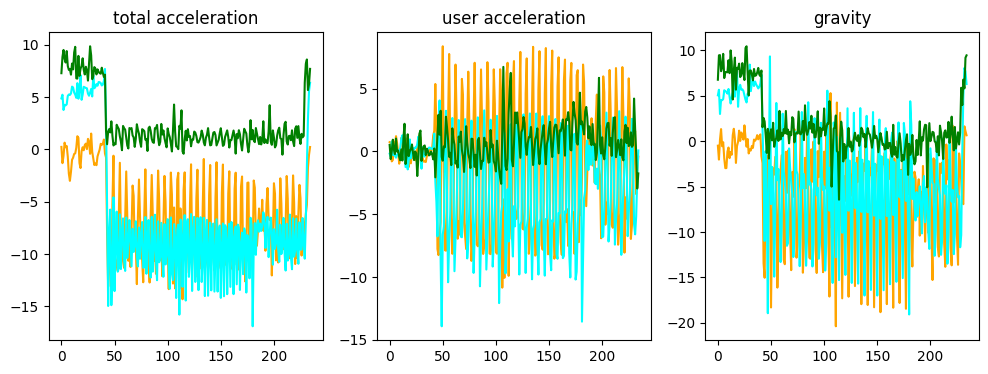

In [627]:
def plot_pedometer(data3D, ax=None):
    """ plot pedometer data
    """
    x = data3D[:, 0]
    y = data3D[:, 1]
    z = data3D[:, 2]

    if not ax:
        plt.figure()
        ax = plt
    ax.plot(x, color='orange')
    ax.plot(y, color='cyan')
    ax.plot(z, color='green')

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
plot_pedometer(data, axs[0])
plot_pedometer(usr_data, axs[1])
plot_pedometer(data - usr_data, axs[2])
axs[0].set_title('total acceleration')
axs[1].set_title('user acceleration')
axs[2].set_title('gravity')
plt.show()

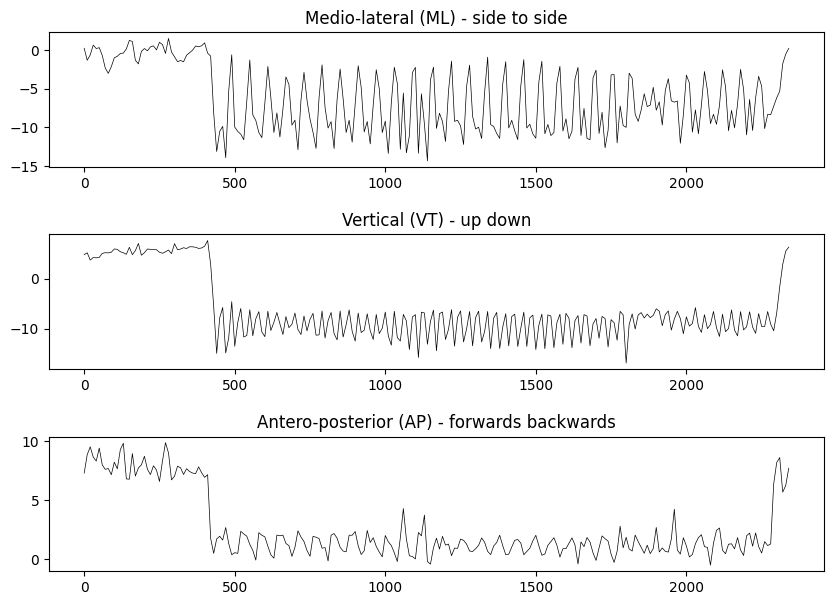

In [628]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,7))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, td_x, linewidth=0.5, color='k')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, td_y, linewidth=0.5, color='k')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, td_z, linewidth=0.5, color='k')

fig.subplots_adjust(hspace=.5)

In [629]:
# sm.plot.plot_signal(time, [{'data': td_x, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5},
#                            {'data': td_y, 'label': 'Vertical (VT) - up down', 'line_width': 0.5},
#                            {'data': td_z, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5}],
#                     subplots=True, fig_size=(10,7))

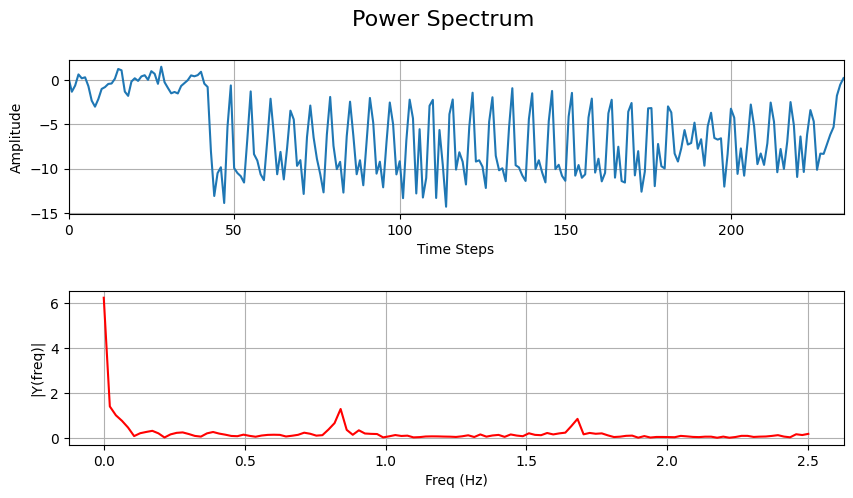

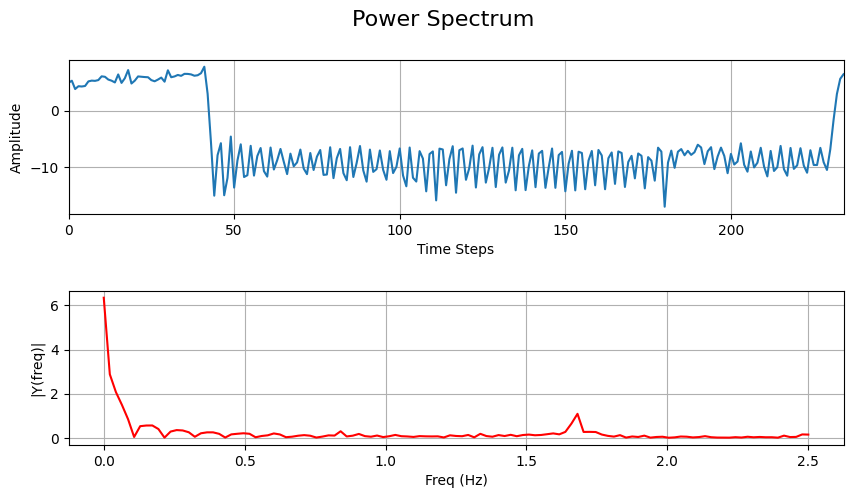

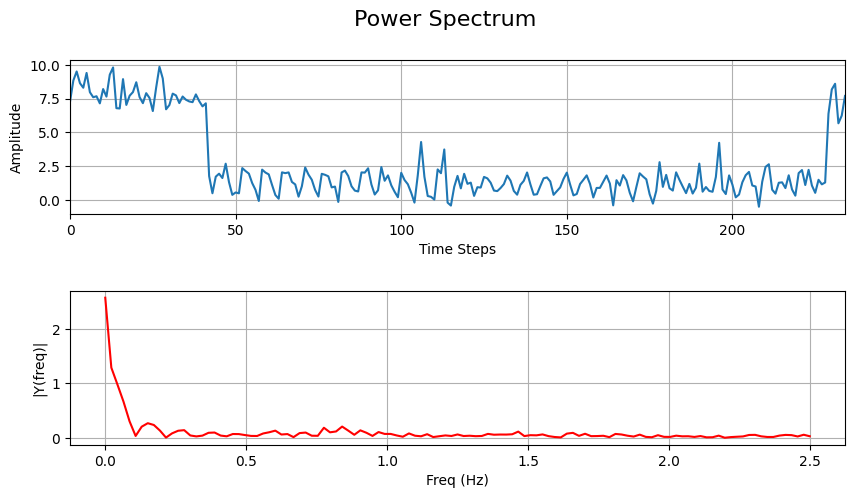

In [630]:
_ = sm.signal.fft(td_x, sampling_rate, plot=True)
_ = sm.signal.fft(td_y, sampling_rate, plot=True)
_ = sm.signal.fft(td_z, sampling_rate, plot=True)

In [631]:
def find_cutoff_frequency(acc, fs):
    nyq = 0.5 * fs
    norm_acc = np.sqrt(np.sum(np.square(acc), axis=1))
    b, a = signal.butter(2, 0.1/nyq, btype='highpass')
    
    filtered_acc = signal.filtfilt(b, a, norm_acc)
    power_spectrum = np.abs(np.fft.rfft(filtered_acc))**2
    
    frequencies = np.fft.rfftfreq(filtered_acc.size, d=1/fs)
    idx = np.argmax(power_spectrum[1:]) + 1
    
    return frequencies[idx]

In [632]:
class Filter:
    @staticmethod
    def low_0_hz(data):
        COEFFICIENTS_LOW_0_HZ = {
            'alpha': [1, -1.979133761292768, 0.979521463540373],
            'beta': [0.000086384997973502, 0.000172769995947004, 0.000086384997973502]
        }
        return Filter.filter(data, COEFFICIENTS_LOW_0_HZ)

    @staticmethod
    def low_5_hz(data):
        COEFFICIENTS_LOW_5_HZ = {
            'alpha': [1, -1.80898117793047, 0.827224480562408],
            'beta': [0.095465967120306, -0.172688631608676, 0.095465967120306]
        }
        return Filter.filter(data, COEFFICIENTS_LOW_5_HZ)

    @staticmethod
    def high_1_hz(data):
        COEFFICIENTS_HIGH_1_HZ = {
            'alpha': [1, -1.905384612118461, 0.910092542787947],
            'beta': [0.953986986993339, -1.907503180919730, 0.953986986993339]
        }
        return Filter.filter(data, COEFFICIENTS_HIGH_1_HZ)
    
    @staticmethod
    def butterworth(data):
        # Assuming total_acc is a numpy array of shape (N, 3) and dt is the sampling interval
        # define the cutoff frequency for the high-pass filter
        cutoff_freq = find_cutoff_frequency(data, 5)
        filter_type = 'lowpass'

        fs = 5  # sampling frequency in Hz
        nyquist_freq = fs / 2
#         cutoff_freq = nyquist_freq * 0.2
        order = 4
        print(f'cuttoff frequency: {str(cutoff_freq)}, filter type: {filter_type}')

        x = data[:, 0]
        y = data[:, 1]
        z = data[:, 2]
#         x = td_x
#         y = td_y
#         z = td_z

        # apply a high-pass filter to each acceleration component
        b, a = signal.butter(order, cutoff_freq/nyquist_freq, filter_type, analog=False)
        
        # Apply the filter to the data
        x_filt = signal.filtfilt(b, a, x)
        y_filt = signal.filtfilt(b, a, y)
        z_filt = signal.filtfilt(b, a, z)        
#         acc_filtered = signal.filtfilt(b, a, data, axis=0)

        # Create plots with overlaid filtered signals (in red)
        fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

        ax[0].set_title('Medio-lateral (ML) - side to side')
        ax[0].plot(time, x, linewidth=0.3, color='blue')
        ax[0].plot(time, x_filt, linewidth=0.8, color='y')

        ax[1].set_title('Vertical (VT) - up down')
        ax[1].plot(time, y, linewidth=0.3, color='blue')
        ax[1].plot(time, y_filt, linewidth=0.9, color='y')

        ax[2].set_title('Antero-posterior (AP) - forwards backwards')
        ax[2].plot(time, z, linewidth=0.3, color='blue')
        ax[2].plot(time, z_filt, linewidth=0.9, color='y')

        fig.subplots_adjust(hspace=.5)

        # combine the filtered x, y, z components into a single array
#         acc_filtered = np.column_stack((x_filt, y_filt, z_filt))
        gravity = np.column_stack((x_filt, y_filt, z_filt))
    
        return gravity

        # Subtract the gravity component
#         user_acc = acc_filtered - np.array([0, 0, 9.81])
#         user_acc = acc_filtered

#         return user_acc

    @staticmethod
    def filter(data, coef):
        fd = np.zeros_like(data)  # filtered_data

        for i in range(2, len(data)):
            fd[i] = coef['alpha'][0] * (data[i] * coef['beta'][0]
                                        + data[i-1] * coef['beta'][1]
                                        + data[i-2] * coef['beta'][2]
                                        - fd[i-1] * coef['alpha'][1]
                                        - fd[i-2] * coef['alpha'][2])
        return fd

cuttoff frequency: 1.6595744680851063, filter type: lowpass


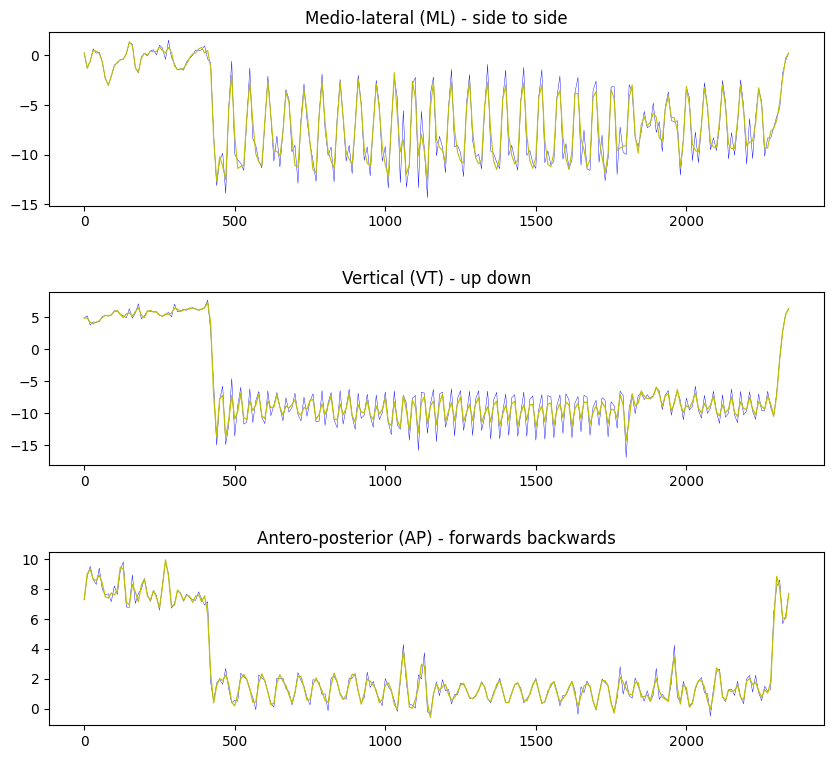

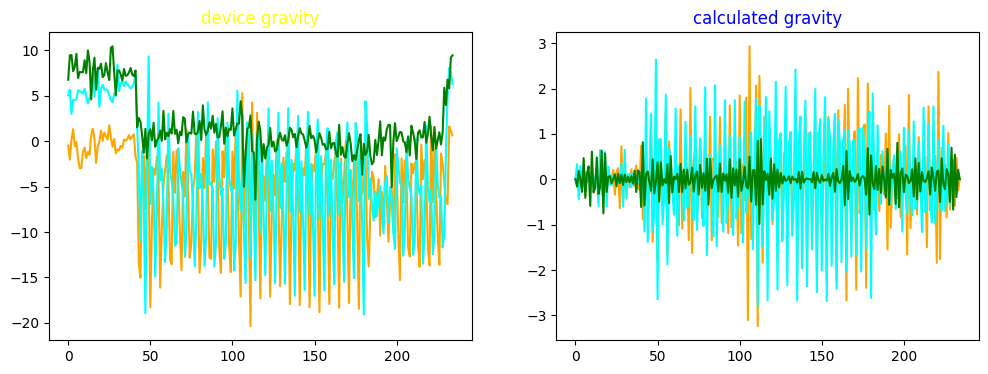

In [633]:
device_gravity = data - usr_data

# calculated_gravity = Filter.low_0_hz(data)
calculated_user_data = Filter.butterworth(data)
calculated_gravity = data - calculated_user_data


fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_pedometer(device_gravity, axs[0])
plot_pedometer(calculated_gravity, axs[1])
axs[0].set_title('device gravity', color='yellow')
axs[1].set_title('calculated gravity', color='blue')
plt.show()

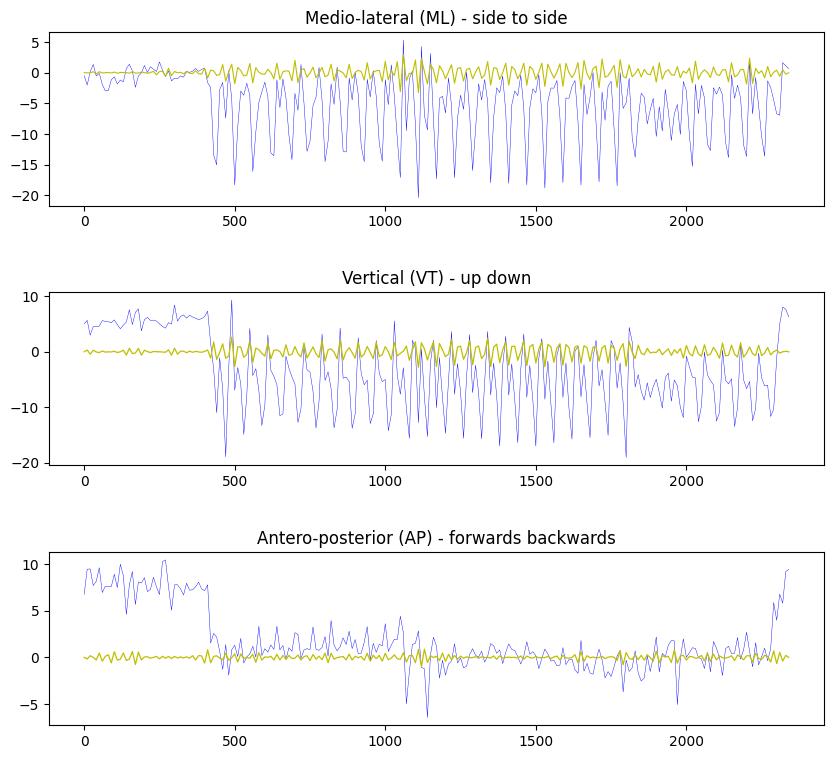

In [634]:
dx = device_gravity.T[0]
dy = device_gravity.T[1]
dz = device_gravity.T[2]

cx = calculated_gravity.T[0]
cy = calculated_gravity.T[1]
cz = calculated_gravity.T[2]


# Create plots with overlaid filtered signals (in red)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, dx, linewidth=0.3, color='blue')
ax[0].plot(time, cx, linewidth=0.8, color='y')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, dy, linewidth=0.3, color='blue')
ax[1].plot(time, cy, linewidth=0.9, color='y')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, dz, linewidth=0.3, color='blue')
ax[2].plot(time, cz, linewidth=0.9, color='y')

fig.subplots_adjust(hspace=.5)

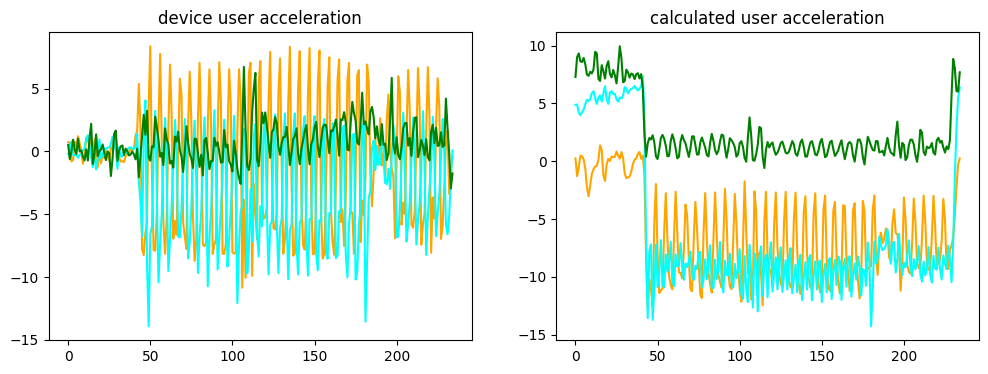

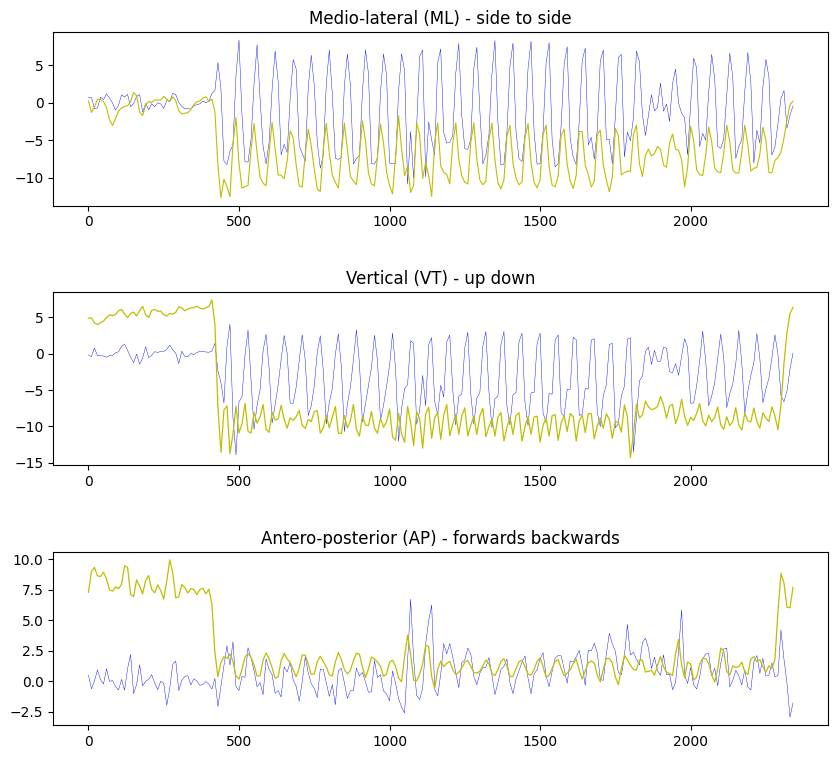

In [635]:
# calculated_user_data = data - calculated_gravity
# calculated_user_data = np.linalg.norm(calculated_user_data, axis=1)
# print(calculated_user_data)
# print(np.linalg.norm(calculated_user_data, axis=1))

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_pedometer(usr_data, axs[0])
plot_pedometer(calculated_user_data, axs[1])
axs[0].set_title('device user acceleration')
axs[1].set_title('calculated user acceleration')
plt.show()

dx = usr_data.T[0]
dy = usr_data.T[1]
dz = usr_data.T[2]

cx = calculated_user_data.T[0]
cy = calculated_user_data.T[1]
cz = calculated_user_data.T[2]


# Create plots with overlaid filtered signals (in red)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, dx, linewidth=0.3, color='blue')
ax[0].plot(time, cx, linewidth=0.8, color='y')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, dy, linewidth=0.3, color='blue')
ax[1].plot(time, cy, linewidth=0.9, color='y')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, dz, linewidth=0.3, color='blue')
ax[2].plot(time, cz, linewidth=0.9, color='y')

fig.subplots_adjust(hspace=.5)

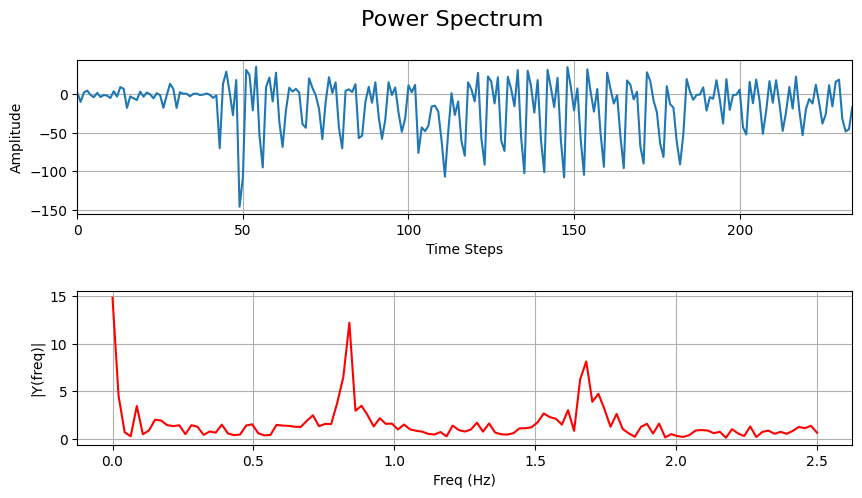

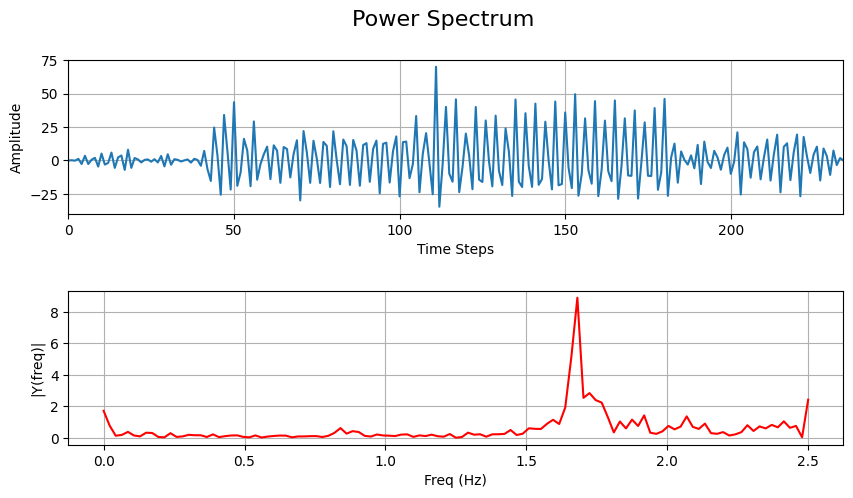

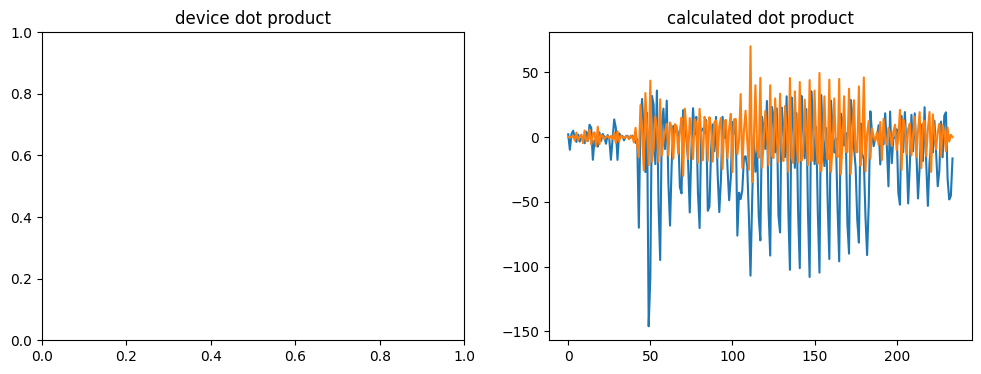

In [636]:
# print(usr_data.shape)
# print(device_gravity.shape)
# print(calculated_gravity.shape)
# print(calculated_user_data.shape)

data_a = np.sum(usr_data * device_gravity, axis=1)
data_b = np.sum(calculated_user_data * calculated_gravity, axis=1)

_ = sm.signal.fft(data_a, sampling_rate, plot=True)
_ = sm.signal.fft(data_b, sampling_rate, plot=True)


fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.plot(data_a)
plt.plot(data_b)

axs[0].set_title('device dot product')
axs[1].set_title('calculated dot product')
plt.show()

In [637]:
data_filtered_a = Filter.low_5_hz(data_a)
data_filtered_a = Filter.high_1_hz(data_filtered_a)
# data_filtered_a = Filter.butterworth(data_a, 5,'lowpass')
# data_filtered_a = Filter.butterworth(data_filtered_a, 1,'highpass')

data_filtered_b = Filter.low_5_hz(data_b)
data_filtered_b = Filter.high_1_hz(data_filtered_b)
# data_filtered_b = Filter.butterworth(data_b, 5,'lowpass')
# data_filtered_b = Filter.butterworth(data_filtered_b, 1,'highpass')

# _ = sm.signal.fft(data_filtered_a, sampling_rate, plot=True)
# _ = sm.signal.fft(data_filtered_b, sampling_rate, plot=True)

# fig,ax = plt.subplots()
# fig.tight_layout()

# ax.plot(data_a)
# ax.plot(data_b)

# plt.tight_layout()
# plt.show()

device:
Number of steps: 44
44
calculated:
Number of steps: 70
70
[18, 44, 47, 50, 53, 56, 58, 59, 60, 62, 65, 69, 71, 80, 83, 86, 89, 92, 93, 95, 98, 99, 101, 105, 107, 108, 111, 114, 117, 119, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 185, 190, 192, 202, 204, 207, 208, 211, 213, 214, 216, 219, 220, 222, 225, 226, 228, 231]


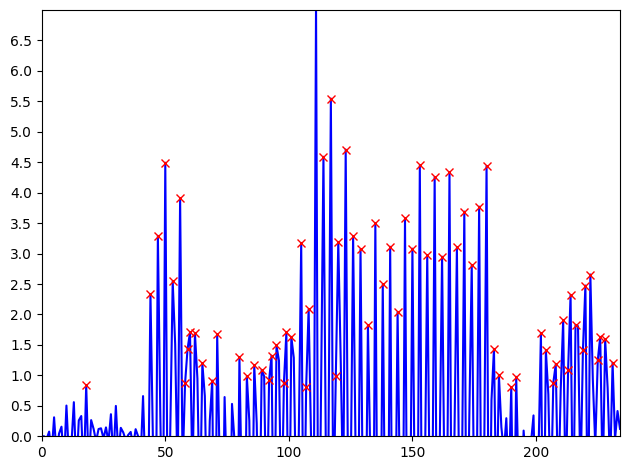

In [639]:
# def measureSteps(data, original):
#     threshold = 0.8
#     steps = 0
#     countSteps = True
    
#     # Calculate the standard deviation of the signal
#     std = np.std(data)

#     # Set a threshold to detect stationary periods
#     std_threshold = 0.1
#     is_stationary = std < std_threshold

#     print(is_stationary) 

#     for i in range(0, len(data)):
#         if data[i] >= threshold:
#             steps += 1
            
#         if data[i] >= threshold and data[i - 1] < threshold:
#             if not countSteps:
#                 continue
    
#             steps += 1
#             countSteps = False
            
#             if data[i] < 0 and data[i - 1] >= 0:
#                 countSteps = True
#     return steps

def find_peaks_windowed(data, window_size, threshold):
    peaks = []
    half_window = window_size // 2
    
    for i in range(half_window, len(data) - half_window):
        window_start = i - half_window
        window_end = i + half_window
        
        # Compute the threshold for this window
#         window_threshold = threshold[window_start:window_end]
        window_threshold = threshold
        
        if np.all(data[i] > window_threshold):
            # Check if the data point is greater than the threshold
            if data[i] == np.max(data[window_start:window_end]):
                peaks.append(i)
    
    return peaks


def measureSteps(data, original):
    # Define the median absolute deviation multiplier
#     noise_std = calculate_snr(original)
#     mad = get_mad(data)
    
    window_size = 3
#     threshold = mad * 1.6
    threshold = 0.8
    
   
#     print("noise std: " + str(noise_std) + " mad: " + str(mad))
#     k = 1.4826  # use 1.4826 for normally distributed data
#     threshold = adaptive_threshold(data, window_size, k)

    peaks = find_peaks_windowed(data, window_size, threshold)
#     peaks, _ = signal.find_peaks(data, distance=0.35*5, height=threshold)
#     print(peaks)
    
    steps = len(peaks)
    print("Number of steps:", steps)
#     print("Peak indices:", peaks)
    return peaks, steps

    
print("device:")
peaks_a, steps_a = measureSteps(data_filtered_a, usr_data)
print(steps_a)

print("calculated:")
peaks_b, steps_b = measureSteps(data_filtered_b, calculated_user_data)

print(steps_b)
print(peaks_b)


fig,ax = plt.subplots()
fig.tight_layout()

y =np.arange(0, 7, 0.5)
plt.margins(x=0, y=0)
plt.yticks(y)

ax.plot(data_filtered_b, 'b')
ax.plot(peaks_b, data_filtered_b[peaks_b] , 'rx')
ax.set_ylim(0,7.0)

plt.tight_layout()
plt.show()
